<a href="https://colab.research.google.com/github/Roy72/1998/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
import tqdm, time

import glob
import random,time

import math

from functools import partial

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
from tensorflow.keras.utils import *
from tensorflow.keras.regularizers import *
import matplotlib.pyplot as plt

#Loading CIFAR10 Dataset

In [2]:

 (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

val_split = 0.1

val_indices = int(len(x_train) * val_split)

new_x_train, new_y_train = x_train[val_indices:], y_train[val_indices:]


x_val, y_val = x_train[:val_indices], y_train[:val_indices]


print(f"Training data samples: {len(new_x_train)}")
print(f"Validation data samples: {len(x_val)}")
print(f"Test data samples: {len(x_test)}")

170498071/170498071 [==============================] - 4s 0us/step
Training data samples: 45000
Validation data samples: 5000
Test data samples: 10000


Normalization

In [3]:
new_x_train_nor = new_x_train/255
x_val_nor  = x_val/255
x_test_nor = x_test/255

Label preparation

In [4]:
from keras.src.utils.np_utils import to_categorical
total_class = len(np.unique(new_y_train))

new_y_train_hot = to_categorical( new_y_train, total_class)

y_val_hot  = to_categorical( y_val, total_class)

y_test_hot = to_categorical( y_test, total_class)


Create random Index

In [5]:
indx = [i for i in range(0, len(new_x_train_nor))]

random.shuffle(indx)

In [6]:
new_y_train_hot_1 =  []
new_x_train_nor_1 = []

small_f = 5000 # allocated length of the dataset
for i in range(small_f):
  new_x_train_nor_1.append(new_x_train_nor[indx[i]] )
  new_y_train_hot_1.append(new_y_train_hot[indx[i]] )


new_y_train_hot_1 = np.array(new_y_train_hot_1)
new_x_train_nor_1 = np.array(new_x_train_nor_1)

In [7]:
batch_size = 32
auto = tf.data.AUTOTUNE

def make_datasets(images, labels):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))

    dataset = dataset.shuffle(50000)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(auto)

train_set =   make_datasets(new_x_train_nor_1, new_y_train_hot_1)
val_set =   make_datasets(x_val_nor, y_val_hot)
test_set =  make_datasets(x_test_nor, y_test_hot )

In [8]:
str_1,str_2 = next(iter(train_set))
stv_1,stv_2 = next(iter(val_set))
sts_1,sts_2 = next(iter(test_set))


print('train, val, test batches', str_1.shape,str_2.shape,stv_1.shape,stv_2.shape,sts_1.shape,sts_2.shape )

train, val, test batches (32, 32, 32, 3) (32, 10) (32, 32, 32, 3) (32, 10) (32, 32, 32, 3) (32, 10)


In [33]:
filter1=24
filter2=36
filter3=48
filter4=64
kernel_size=3
dropout = 0.50

inputs = Input(shape=(32, 32, 3))

y = Conv2D(filters=filter1,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
y = MaxPooling2D()(y)
#y=BatchNormalization()(y)

y = Conv2D(filters=filter2,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(y)
y = MaxPooling2D()(y)
#y=BatchNormalization()(y)


y = Conv2D(filters=filter3,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(y)
y = MaxPooling2D()(y)
#y=BatchNormalization()(y)


#y = Conv2D(filters=filter4,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(y)
y=BatchNormalization()(y)

y = Flatten()(y)

y = Dropout(dropout)(y)
outputs = Dense(10, activation='softmax')(y)


model = Model(inputs=inputs, outputs=outputs)



In [34]:
 #lr_schedule = keras.optimizers.schedules.ExponentialDecay(3e-6, decay_steps=6, decay_rate=0.7)
 #optima = tf.keras.optimizers.Adam(learning_rate=lr_schedule,clipnorm =1.0)

model.compile(optimizer='adam',loss="categorical_crossentropy", metrics=["accuracy"],)

In [35]:
history = model.fit(train_set,validation_data=val_set,epochs=50,)

Epoch 1/50
157/157 [==============================] - 10s 54ms/step - loss: 2.4207 - accuracy: 0.2290 - val_loss: 2.0585 - val_accuracy: 0.2770
Epoch 2/50
157/157 [==============================] - 8s 53ms/step - loss: 1.9229 - accuracy: 0.3248 - val_loss: 1.7637 - val_accuracy: 0.3650
Epoch 3/50
157/157 [==============================] - 8s 54ms/step - loss: 1.7142 - accuracy: 0.3868 - val_loss: 2.0336 - val_accuracy: 0.3104
Epoch 4/50
157/157 [==============================] - 9s 56ms/step - loss: 1.5762 - accuracy: 0.4308 - val_loss: 1.4724 - val_accuracy: 0.4864
Epoch 5/50
157/157 [==============================] - 9s 55ms/step - loss: 1.4663 - accuracy: 0.4682 - val_loss: 1.5144 - val_accuracy: 0.4446
Epoch 6/50
157/157 [==============================] - 8s 53ms/step - loss: 1.4192 - accuracy: 0.4902 - val_loss: 1.3384 - val_accuracy: 0.5184
Epoch 7/50
157/157 [==============================] - 8s 48ms/step - loss: 1.3633 - accuracy: 0.5102 - val_loss: 1.3768 - val_accuracy: 0.507

In [38]:
filter1=24
filter2=36
filter3=48
filter4=64
kernel_size=3
dropout = 0.65

inputs = Input(shape=(32, 32, 3))

y = Conv2D(filters=filter1,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
y = MaxPooling2D()(y)
#y=BatchNormalization()(y)

y = Conv2D(filters=filter2,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(y)
y = MaxPooling2D()(y)
#y=BatchNormalization()(y)


y = Conv2D(filters=filter3,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(y)
y = MaxPooling2D()(y)
#y=BatchNormalization()(y)


#y = Conv2D(filters=filter4,kernel_size=kernel_size,activation='relu', padding='same', kernel_initializer='he_normal')(y)
y=BatchNormalization()(y)

y = Flatten()(y)

y = Dropout(dropout)(y)
outputs = Dense(10, activation='softmax')(y)
model1 = Model(inputs=inputs, outputs=outputs)

In [39]:
model1.compile(optimizer='adam',loss="categorical_crossentropy", metrics=["accuracy"],)

In [40]:
history1 = model1.fit(train_set,validation_data=val_set,epochs=50,)

Epoch 1/50
157/157 [==============================] - 9s 50ms/step - loss: 2.7493 - accuracy: 0.1900 - val_loss: 1.8735 - val_accuracy: 0.3490
Epoch 2/50
157/157 [==============================] - 9s 55ms/step - loss: 2.0834 - accuracy: 0.2970 - val_loss: 1.6749 - val_accuracy: 0.4088
Epoch 3/50
157/157 [==============================] - 10s 64ms/step - loss: 1.8259 - accuracy: 0.3512 - val_loss: 1.6251 - val_accuracy: 0.4142
Epoch 4/50
157/157 [==============================] - 11s 69ms/step - loss: 1.6479 - accuracy: 0.4046 - val_loss: 1.5336 - val_accuracy: 0.4574
Epoch 5/50
157/157 [==============================] - 7s 47ms/step - loss: 1.5702 - accuracy: 0.4292 - val_loss: 1.4202 - val_accuracy: 0.4910
Epoch 6/50
157/157 [==============================] - 8s 53ms/step - loss: 1.4877 - accuracy: 0.4620 - val_loss: 1.4434 - val_accuracy: 0.4728
Epoch 7/50
157/157 [==============================] - 10s 61ms/step - loss: 1.4164 - accuracy: 0.4908 - val_loss: 1.4992 - val_accuracy: 0.4

In [41]:
loss_t1, acc_t1 = model1.evaluate(test_set)

313/313 [==============================] - 4s 12ms/step - loss: 1.1966 - accuracy: 0.5983


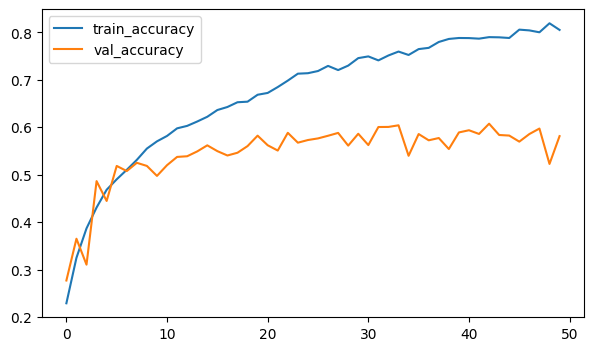

In [44]:
fig, ax = plt.subplots(figsize=(7, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')

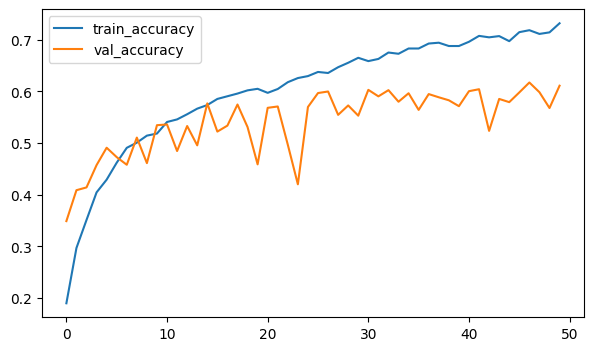

In [43]:
fig, ax = plt.subplots(figsize=(7, 4))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')